In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# dd=[]
# import os
# for dirname, _, filenames in os.walk('../input/age-prediction/age_prediction_up/age_prediction/train'):
#     for filename in filenames:
#         dd.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 981 kB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 263 kB 25.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 25.3 MB/s eta 0:00:01
  Created wheel for ktrain: filename=ktrain-0.27.2-py3-none-any.whl size=25283078 sha256=d12bfedf7da951234444aa140578004c586f485177df8f3cb9e544da564a1ba7
  Stored in directory: /root/.cache/pip/wheels/88/be/4a/971c83a380a40f12e877f643ca1b94dc65f528f94c88dbcff7
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9918 sha256=48d1516c6acbd9324232933e48856bd6309ac19afad74daca0b3c756bdc3dd9a
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-none-any.whl size=34205 sha256=a544e9ab1ff012484c52bc7f04b0a6ff82dd77f3

In [ ]:
folder_path=[]
label = []
path = '../input/age-prediction/age_prediction_up/age_prediction/train'
for i in os.listdir(path):
    path1=(os.path.join(path,i))
    folder_path.append(path1)


In [ ]:
file_path=[]
labels=[]
for i in folder_path:
    for j in os.listdir(i):
        file_path.append(i+'/'+j)
for i in file_path:
    a = i.split('/')[-2]
    labels.append(a)

In [ ]:
len(labels)

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame({'path':file_path, 'age':labels})

In [ ]:
df.age[56729]

In [ ]:
df.to_csv('age_data.csv')

In [ ]:
import os
os.chdir('/kaggle/working')

In [134]:
# for i in df.path:
#     name = i.split('/')[-1]
#     #print(name)
#     df.replace(i,name,inplace=True)
    


In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
image=load_img(df.path[1])

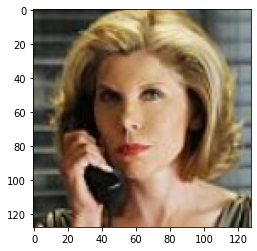

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(image)

In [ ]:
from ktrain import vision as vis

In [ ]:
# from sklearn.model_selection import train_test_split
# train,val = train_test_split(df,stratify=df['age'],test_size=0.2,random_state=38)

In [8]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# traingen = ImageDataGenerator(zoom_range=0.2,
#                               horizontal_flip=True,
#                               rescale=1./255,
#                               shear_range=0.2,
#                              height_shift_range=0.3,
#                              width_shift_range=0.3)

# train_generated = traingen.flow_from_directory(directory=r'../input/age-prediction/age_prediction_up/age_prediction/train',
#                                             target_size=(128,128),
#                                          color_mode='rgb',
#                                              batch_size=32,
#                                              shuffle=True,
                                        
# )

Found 185632 images belonging to 100 classes.


In [ ]:
# array=mpimg.imread(df.path[1])

In [ ]:
# images=[]
# for i in range(0,df.shape[0]):
#     image=mpimg.imread(df.path[1])
#     image=image/255
#     images.append(image)

In [11]:
from ktrain import vision as vis

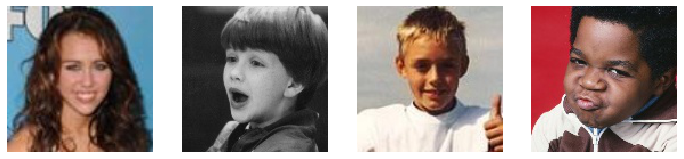

In [16]:
vis.show_random_images('../input/age-prediction/age_prediction_up/age_prediction/train/010')

In [45]:
train_data, val_data, proc = vis.images_from_folder(datadir='../input/age-prediction/age_prediction_up/age_prediction/',
                                                   #data_aug=traingen,
                                                    data_aug = vis.get_data_aug(horizontal_flip=True,
                                                                               rescale=1./255,
                                                                               height_shift_range=0.3,
                                                     width_shift_range=0.3),
                                                   train_test_names=['train','test'])

Found 185632 images belonging to 100 classes.
Found 185632 images belonging to 100 classes.
Found 47568 images belonging to 100 classes.


In [93]:
train_data, val_data, proc = vis.images_from_csv('../input/d/viicky/age-prediction/age_data.csv',
                                             
                                                 image_column='path',
                                                 label_columns=['age'],
                                                 is_regression=True,
                                                   #data_aug=traingen,
                                                 data_aug = vis.get_data_aug(horizontal_flip=True,
                                                                               rescale=1./255,
                                                                               height_shift_range=0.3),
                                            
                                                 random_state=30)

/opt/conda/lib/python3.7/site-packages/ktrain/utils.py:591: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \


['age']
         age
46821   41.0
177209  32.0
182838  30.0
9234    51.0
182560  30.0
['age']
         age
127460  40.0
2804    48.0
49116   36.0
98384   52.0
126723  40.0
Found 4336 images belonging to 1 classes.
Found 167068 validated image filenames.
Found 18564 validated image filenames.


In [94]:
model = vis.image_regression_model('pretrained_resnet50',train_data, val_data,
                            #freeze_layers=15
                            )

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
pretrained_resnet50 model created.


In [97]:
import ktrain
learner=ktrain.get_learner(model=model, train_data  = train_data, val_data = val_data, workers=8, use_multiprocessing=False,
                          batch_size=128)

In [48]:
learner.lr_find(max_epochs=3)

In [98]:
learner.fit_onecycle(1e-4,5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
1306/1306 [==============================] - 2106s 2s/step - loss: 184.3340 - mae: 10.5671 - val_loss: 149.2008 - val_mae: 9.4857
Epoch 2/5
1306/1306 [==============================] - 2043s 2s/step - loss: 152.7048 - mae: 9.6187 - val_loss: 134.5972 - val_mae: 9.0527
Epoch 3/5
1306/1306 [==============================] - 2110s 2s/step - loss: 144.2453 - mae: 9.3386 - val_loss: 129.8879 - val_mae: 8.7365
Epoch 4/5
1306/1306 [==============================] - 2134s 2s/step - loss: 140.4269 - mae: 9.2067 - val_loss: 125.9180 - val_mae: 8.7064
Epoch 5/5
1306/1306 [==============================] - 2144s 2s/step - loss: 138.0669 - mae: 9.1233 - val_loss: 124.6233 - val_mae: 8.6254


In [99]:
learner.freeze(15)


In [102]:
learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
1306/1306 [==============================] - 2209s 2s/step - loss: 105.7864 - mae: 7.8277 - val_loss: 87.5214 - val_mae: 7.0363
Epoch 2/2
1306/1306 [==============================] - 2127s 2s/step - loss: 85.4143 - mae: 6.9138 - val_loss: 72.2607 - val_mae: 6.3229


In [103]:
predictor = ktrain.get_predictor(learner.model, proc)

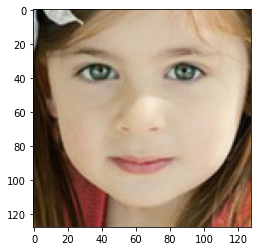

In [132]:
vis.show_image('../input/age-prediction/age_prediction_up/age_prediction/test/006/6780.jpg')

The predicted age: 33
The actual age: 028


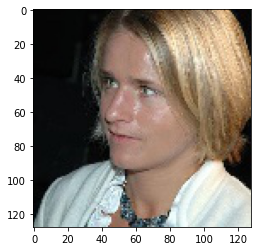

In [140]:

data = '../input/age-prediction/age_prediction_up/age_prediction/test/028/10080.jpg'
vis.show_image(data)
print('The predicted age:',int(predictor.predict_filename(data)))
print('The actual age:',data.split('/')[-2])

The predicted age: 7
The actual age: 006


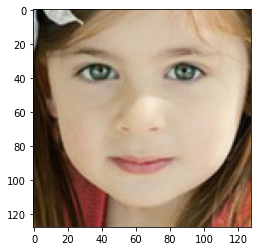

In [142]:
data = '../input/age-prediction/age_prediction_up/age_prediction/test/006/6780.jpg'
vis.show_image(data)

print('The predicted age:',int(predictor.predict_filename(data)))
print('The actual age:',data.split('/')[-2])

The predicted age: 65
The actual age: 074


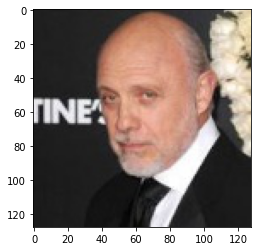

In [141]:
data = '../input/age-prediction/age_prediction_up/age_prediction/test/074/14141.jpg'
vis.show_image(data)

print('The predicted age:',int(predictor.predict_filename(data)))
print('The actual age:',data.split('/')[-2])